In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from TSP_utils import TSP_solver, TSP_plotter, TSP_generator, TSP_loader
from s2v_utils import *
import numpy as np
import networkx as nx
import tqdm
import tsplib95
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
solver = TSP_solver()
# solver.add_sol_times(data_dir='test_sets/synthetic_n_50_1000', num_runs=10)
solver.add_sol_times(data_dir='training_sets/synthetic_n_50_10000', num_runs=10)
solver.del_tmp_files()

Calculated solution times for 376 samples
Folder name: training_sets/synthetic_n_50_10000/, Index: 376, file name: TSP_Problem_376.tsp
Folder name: training_sets/synthetic_n_50_10000/, Index: 377, file name: TSP_Problem_377.tsp


KeyboardInterrupt: 

In [3]:
solver.del_tmp_files()

NameError: name 'solver' is not defined

In [5]:
cparam = 'random'
approx_path = 's2v_dqn_results/train_cparam_random_test_cparam_random_run_0_num_samples_10000.csv'
num_test_samples = 10000
approx_list, soltime_list = get_approx_and_soltime_lists(approx_path=approx_path, cparam=cparam, 
                                                         num_samples=num_test_samples, data_root='training_sets')
soltime_list = np.mean(soltime_list, axis=1)
x, y, p_value, rsquared, slope = get_reg_fit_data(soltime_list, approx_list)

In [6]:
len(soltime_list)

10000

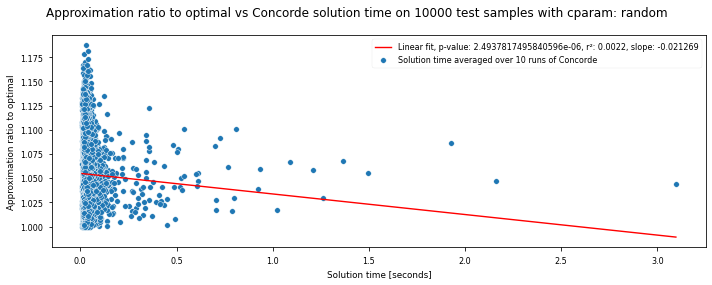

In [8]:
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
sns.scatterplot(x=soltime_list, y=approx_list, label='Solution time averaged over 10 runs of Concorde', ax=ax)
sns.lineplot(x=x, y=y, color='r', label=f'Linear fit, p-value: {p_value}, r²: {rsquared}, slope: {slope}', ax=ax)
ax.set_ylabel('Approximation ratio to optimal')
ax.set_xlabel('Solution time [seconds]')

ax.legend()
plt.suptitle(f'Approximation ratio to optimal vs Concorde solution time on {num_test_samples} test samples with cparam: {cparam}')
plt.tight_layout()
plt.savefig('scatter_approx_vs_soltime_{}_large.jpg'.format(cparam), dpi=400)

In [3]:
solver = TSP_solver()
for folder in os.listdir('test_sets'):
    if 'delta_0.005' not in folder:
        continue
    print(f"Current folder: {folder}")
    folder_path = f'test_sets/{folder}'
    file_path = folder_path + '/sol_times.txt'
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            file_nums = [float(line.split(':')[0].strip().split('_')[-1].split('.')[0].strip()) for k, line in enumerate(lines)]
            max = int(np.max(file_nums))
            if max == 999:
                print(f"obtained all solution times for samples in folder: {folder}")
                continue
            else:
                print(f"starting at index {max+1} for samples in folder: {folder}")
                solver.add_sol_times(data_dir=folder_path, num_runs=10, start_index=max+1, access_mode='a')
                continue       
    solver.add_sol_times(data_dir=f'test_sets/{folder}', num_runs=10)

Current folder: synthetic_n_50_cparam_0.83_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.83_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.72_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.72_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.82_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.82_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.75_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.75_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.79_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.79_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.7_delta_0.005_1000
obtained all solution times for samples in folder: synthetic_n_50_cparam_0.7_delta_0.005_1000
Current folder: synthetic_n_50_cparam_0.84_delta_0.005_1000
obtained all